# Minimizing a Univariate Function 


In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import time

## Locating extrema in a function (analytical solution)

Let's start with a basic idea: we are trying to find extrema (either a minimum or a maximum value) returned by a univariate scalar function. We already learned how to do this analytically in our calculus courses, right?  We just find where the derivative of our function is equal to zero!

It's always nice to start out with a problem that we can solve analytically, so let's look at a cubic polynomial. 

$$y(x) = -1.6x^3 + 5x^2 + 8x - 23$$

We know that we can expect, at most, 3 real roots for this polynomial, and we can expect at most 2 extrema (either maxima or minima). In the cell below, graph this function on the domain $x = [-2.3, 4]$; plot the x-axis to visualize the root locations, and find any roots in that domain using an algorithm of your choice.

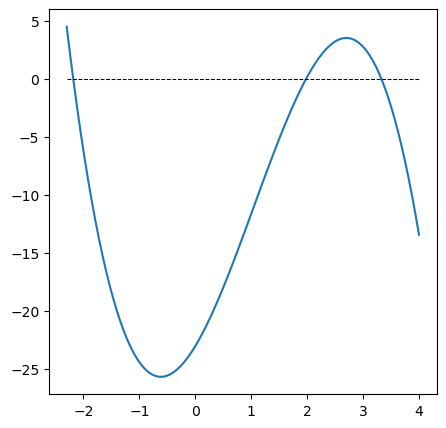

In [2]:
y = lambda x: -1.6*x**3 + 5*x**2 + 8*x - 23
xset = np.linspace(-2.3, 4, 100)

## Graphing function
plt.figure(1, figsize = (5,5))
plt.plot(xset, y(xset))
plt.hlines(0, -2.3, 4, linestyle = 'dashed', color = 'black', linewidth = 0.75)
plt.show()

In [ ]:
xguess = [-2, 2, 3.5]
roots  = [opt.newton(y, x0) for x0 in xguess]
print(f'The roots are located at x = {np.round(roots, 3)}')

While a graphical analysis is usually informative, we can be more precise in our solution by finding the roots of the derivative of y(x), i.e., by solving:

$$y^{\prime}(x) = -4.8x^2 + 10x + 8 = 0$$

In [ ]:
yp = lambda x: -4.8*x**2 + 10*x +8
ypp = lambda x: -9.6*x + 10

plt.figure(1, figsize = (5,5))
plt.plot(xset, yp(xset), label = 'first derivative of y')
plt.plot(xset, ypp(xset), label = 'second derivative of y')
plt.hlines(0, -2.3, 4, linestyle = 'dashed', color = 'black', linewidth = 0.75)
plt.legend()
plt.show()

In [ ]:
xguess = [-1, 3]
opts   = [opt.newton(yp, x0) for x0 in xguess]
print(f'Extreme in this function are located at x = {np.round(opts, 3)}')
print(f'The extrema in the function have the values y = {np.round(y(np.array(opts)), 2)}')
print(f'The second derivative of the function at these locations are ypp = {np.round(ypp(np.array(opts)), 2)}')

## Newton's Method

In [4]:
y   = lambda x: -1.6*x**3 + 5*x**2 + 8*x - 23
dy  = lambda x: -3*1.6*x**2 + 10*x + 8
ddy = lambda x: -2*3*1.6*x + 10

x = 100.0
while abs(dy(x)) > 1e-8:
    print(round(x,4), round(y(x),4), round(dy(x),4))
    x = x - dy(x)/ddy(x)   

100.0 -1549223.0 -46992.0
50.5347 -193335.6372 -11744.6988
25.816 -24012.9176 -2932.8763
13.4844 -2928.9265 -729.9318
7.3736 -333.6043 -179.2396
4.4249 -28.3244 -41.7344
3.14 1.8837 -7.9254
2.7465 3.5402 -0.743
2.7011 3.5572 -0.0099
2.7005 3.5572 -0.0


In [ ]:
# y   = lambda x: -1.6*x**3 + 5*x**2 + 8*x - 23
# dy  = lambda x: -3*1.6*x**2 + 10*x + 8
# ddy = lambda x: -2*3*1.6*x + 10

# xrange = [-3, 4]
# yrange = [0, 0]
# xplot  = np.linspace(xrange[0], xrange[1], 10000)
# yplot  = y(xplot)

# x = -3
# xlist = []
# ylist = []
# while abs(dy(x)) > 1e-8:
#     xlist.append(x)
#     ylist.append(y(x))
#     plt.plot(xplot,yplot,color = 'black', linewidth = 1)
#     plt.plot(xrange,yrange, linestyle = 'dashed', linewidth = 1)
#     plt.scatter(xlist, ylist, color = 'red', marker = 'o')
#     plt.show()
#     #print(round(x,4), round(y(x),4), round(dy(x),4))
#     #time.sleep(2) #Add a 2 second pause before going on to next iteration
#     x = x - dy(x)/ddy(x)

## Optimization Routines in Scipy

https://docs.scipy.org/doc/scipy/reference/optimize.html

<div class = "alert alert-block alert-info">
    <b>Important</b>: Our very simple Newton method above found extrema without distinguishing between maxima and minima.  It was only looking for a place where the derivative = 0. Scipy optimization algorithms will always ***minimize*** your objective function by default.  If you want to ***maximize*** a function, you can always just multiply the value returned by your objective function by -1.
    </div>

### `opt.minimize_scalar()`

The usage for scipy optimization algorithms is very similar to what we learned with root finding for scalar functions.  Let's start with the most basic option:  minimizing a univariate, scalar function, i.e., the case we are currently considering:

$$y(x) = -1.6x^3 + 5x^2 + 8x - 23$$

Since y(x) is univariate, we are really just looking for the value of x where y is at a minimum. If all you need to do is find a local minimum in a univariate function, you can use `opt.minimize_scalar()` from `scipy`. It has a very small set of minimum inputs: you only need to provide it with the function, and it will return a local minimum.

In [8]:
opt.minimize_scalar(y)

     fun: -25.656739046884304
 message: '\nOptimization terminated successfully;\nThe returned value satisfies the termination criteria\n(using xtol = 1.48e-08 )'
    nfev: 15
     nit: 11
 success: True
       x: -0.6171691124890302

In [10]:
sol = opt.minimize_scalar(y)
print(sol, '\n')
print(sol.fun, sol.nfev, sol.nit, sol.success, sol.x)

     fun: -25.656739046884304
 message: '\nOptimization terminated successfully;\nThe returned value satisfies the termination criteria\n(using xtol = 1.48e-08 )'
    nfev: 15
     nit: 11
 success: True
       x: -0.6171691124890302 

-25.656739046884304 15 11 True -0.6171691124890302


## Introducing `opt.minimize()`

Digging a bit deeper into packages available in **Scipy**, the `opt.minimize()` function is a more general routine than `opt.minimize_scalar()`. It will allow you to minimize either ***univariate*** or ***multivariate*** scalar functions, the latter meaning that a function accepts multiple arguments (inputs), but it only returns a single, scalar output. 

### The basic syntax of `opt.minimize()`

At a minimum (no pun intended), `opt.minimize()` in its default state requires us to provide the function name and an initial guess at the variable values where we expect to find a minimum:

```python
opt.minimize(function_name, initial_guess_for_optimum_location)
```

In [11]:
opt.minimize(y, -1)

      fun: -25.656739046884304
 hess_inv: array([[1]])
      jac: array([2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 1
     njev: 3
   status: 0
  success: True
        x: array([-0.6171691])

### Changing algorithms with `opt.minimize()`

In [12]:
opt.minimize(y, -1, method = 'Nelder-Mead')

 final_simplex: (array([[-0.6171875 ],
       [-0.61708984]]), array([-25.65673904, -25.656739  ]))
           fun: -25.656739044189454
       message: 'Optimization terminated successfully.'
          nfev: 28
           nit: 14
        status: 0
       success: True
             x: array([-0.6171875])

In [14]:
opt.minimize(y, -1, method = 'dogleg', jac = dy, hess = ddy, options = {'disp' : True})

Optimization terminated successfully.
         Current function value: -25.656739
         Iterations: 3
         Function evaluations: 4
         Gradient evaluations: 4
         Hessian evaluations: 3


     fun: -25.65673904688429
    hess: array([[15.92482381]])
     jac: array([-6.93231542e-07])
 message: 'Optimization terminated successfully.'
    nfev: 4
    nhev: 3
     nit: 3
    njev: 4
  status: 0
 success: True
       x: array([-0.61716915])

In [15]:
opt.minimize(y, -1, bounds = [(0,1)])

      fun: -23.0
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([7.99999995])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 2
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0.])

### A bit of practice with `opt.minimize()`

Before we move on to a more complex problem with constraints, try a few things with our original cubic equation y(x):

1. Minimize y(x) using the Powell algorithm.
2. Minimize y(x) using the trust-krylov algorithm
3. Minimize y(x) using the SLSQP algorithm but place a lower bound of 1 on x.
4. Minimize y(x) using the BFGS method; set the tolerance to 1e-8; set the max iterations to 1000, and turn the display on.

In [ ]:
opt.minimize(y, 1, method = 'Powell')
# opt.minimize(y, 1, jac = dy, hess = ddy, method = 'trust-krylov')
# opt.minimize(y, 1.0, method = 'SLSQP', bounds = [(1.0, None)])
# opt.minimize(y, 1.0, method = 'BFGS', tol = 1e-8, options = {'disp' : True, 'maxiter' : 1000})

## Finding global optima

As a final example, we want to talk about finding global optima in a function that may have many local optima.  Generally speaking, the higher dimensional your optimization problem becomes (i.e., the more parameters you are trying to fit), the more likely you are to have many, many local minima.  But what you are actually interested in is a global minimum...and these can be very difficult to find.  As a simple example, we'll look at a univariate function of x that has many local minima but only one global minimum:

$$k(x) =  \frac{\sin (10 \pi x)}{2x} + \left(x - 1\right)^4$$

Plot the function on the domain $x = [0.1, 2.5]$; see for yourself!

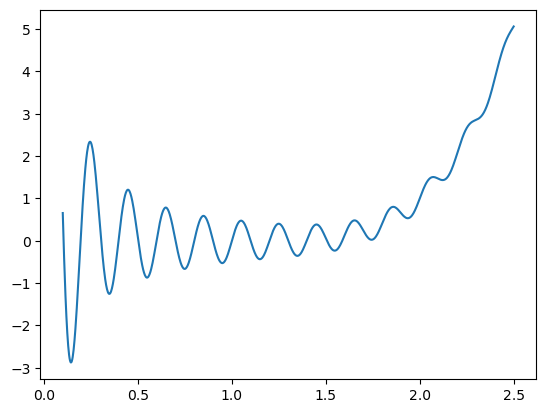

In [16]:
k = lambda x: np.sin(10*np.pi*x)/2/x + (x - 1)**4
xplot = np.linspace(0.1, 2.5, 1000)
kplot = k(xplot)
plt.plot(xplot, kplot)
plt.show()

Clearly, there are many local minima on this domain, but only one global minimum somewhere around $x = 0.53$.  How to find it exactly?  Try out some of our above optimization routines with varied initial guesses.  

For example: 

The for an initial guess of 0.25, the minimum we find is a value of k = -0.232 at x = 1.547.


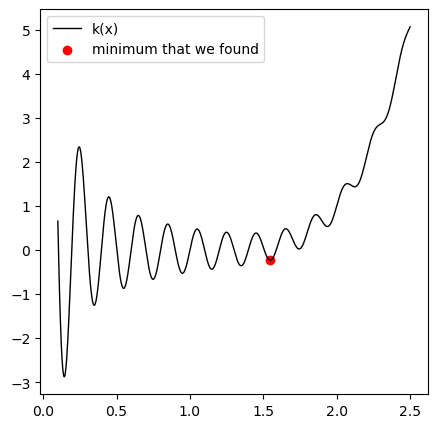

In [17]:
xguess = 0.25
sol = opt.minimize(k,xguess, bounds = [(0.1, 2.5)])
plt.figure(1, figsize = (5, 5))
plt.plot(xplot, kplot, color = 'black', linewidth = 1, label = 'k(x)')
plt.scatter(sol.x[0], sol.fun, color = 'red', marker = 'o', label = 'minimum that we found')
plt.legend()

print(f'The for an initial guess of {xguess}, the minimum we find is a value of k = {k(sol.x[0]):3.3f} at x = {sol.x[0]:3.3f}.')

### You may want to try a global optimization algorithm...

This is the type of case where we might be interested in trying out a global optimization routine, of which there are several available in Scipy: `basinhopping`, `brute`, `differential_evolution`, `shgo`, and `dual_annealing`.  They all have fairly similar syntax. 

The for an initial guess of 1, the minimum we find is a value of k = -2.874 at x = 0.144.


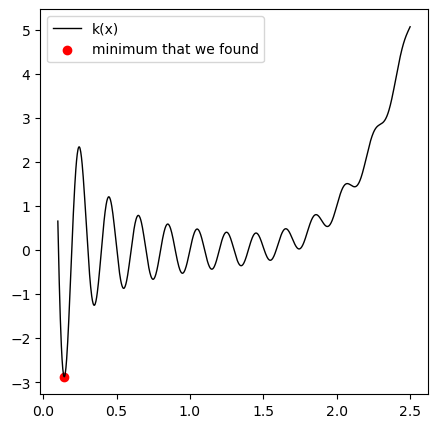

In [18]:
xguess = 1
sol   = opt.basinhopping(k, 1)
plt.figure(1, figsize = (5, 5))
plt.plot(xplot, kplot, color = 'black', linewidth = 1, label = 'k(x)')
plt.scatter(sol.x[0], sol.fun, color = 'red', marker = 'o', label = 'minimum that we found')
plt.legend()

print(f'The for an initial guess of {xguess}, the minimum we find is a value of k = {k(sol.x[0]):3.3f} at x = {sol.x[0]:3.3f}.')

The minimum we find is a value of k = -2.874 at x = 0.144.


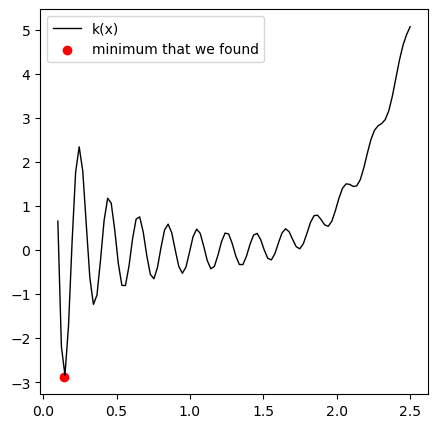

In [19]:
xplot = np.linspace(0.1, 2.5, 100)
kplot = k(xplot)
sol   = opt.dual_annealing(k, [(0.1, 2.5)])
plt.figure(1, figsize = (5, 5))
plt.plot(xplot, kplot, color = 'black', linewidth = 1, label = 'k(x)')
plt.scatter(sol.x[0], sol.fun, color = 'red', marker = 'o', label = 'minimum that we found')
plt.legend()

print(f'The minimum we find is a value of k = {k(sol.x[0]):3.3f} at x = {sol.x[0]:3.3f}.')